### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
import numpy as np
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

In [14]:
display(x.shape)
display(x.dtype)
display(x[0])

(2000,)

dtype('complex128')

(9.904140158308326-23.73106678046714j)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 


In [17]:
n_muestras = len(x)
frecuencia = 100
duracion = n_muestras / frecuencia
print(f' La señal posee {n_muestras} muestras')
print(f' La duración de la señal es de {duracion}[s]')

 La señal posee 2000 muestras
 La duración de la señal es de 20.0[s]


- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta


> **Frecuencia de Nyquist**
>
> Es la frecuencia más alta con que puede representarse una señal muestreada a 𝐹𝑠
>
> Su valor es $\frac{F_s}{2}$

In [15]:
print(f' La mayor frecuencia que podemos estudiar usando transformada'
      +f' de Fourier en este problema es de {frecuencia / 2}[Hz]')

 La mayor frecuencia que podemos estudiar usando transformada de Fourier en este problema es de 50.0[Hz]


Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo


<IPython.core.display.Javascript object>


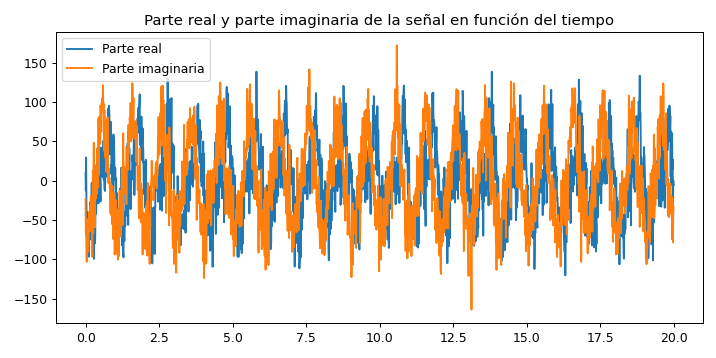

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook
p_real = np.real(x)
p_imag = np.imag(x)
t = np.arange(0, duracion, step=1./frecuencia); 
fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.plot(t, p_real, label='Parte real')
ax.plot(t, p_imag, label='Parte imaginaria')
ax.legend()
ax.set_title("Parte real y parte imaginaria de la señal en función del tiempo")
plt.show()

- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma


<IPython.core.display.Javascript object>


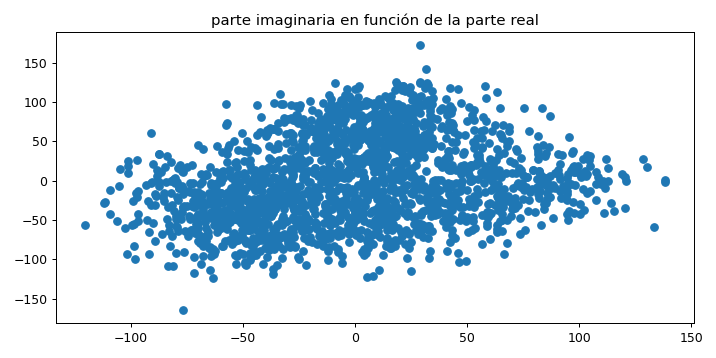

In [23]:
fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.scatter(p_real, p_imag)
ax.set_title("parte imaginaria en función de la parte real")
plt.show()

- Describa y clasifique la señal según los comportamientos que observa

Se ve un elefante cruelmente asesinado por cazadores furtivos 😢

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

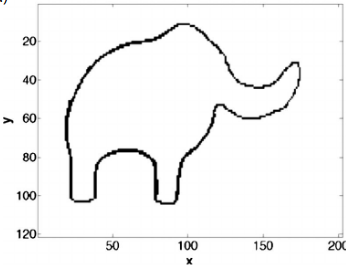